In [24]:
%matplotlib inline

from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np 
import seaborn as sns
import random 
import warnings
import operator
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

path = "./"

from pandas import ExcelWriter
from pandas import ExcelFile
 
df = pd.read_excel('higherEd.xlsx', sheetname='Gifts over 50M USD')
 
print("Column headings:")
print(df.columns)

Column headings:
Index(['College', 'Year', 'Primary Purpose', 'Amount Given'], dtype='object')


In [5]:
#IMP FUnctions

# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

#Check Nan rows
nans = lambda df: df[df.isnull().any(axis=1)]

In [56]:
df.sort_values(by=['Year', 'Amount Given'], ascending=False).head(n=20)

,College,Year,Primary Purpose,Amount Given
55,University of Virginia,2019,To create school of data science,120.0
78,George Mason University,2019,Endowed chairs in the law school,50.0
0,Johns Hopkins University,2018,To provide funds for need-blind admissions,1800.0
1,Broad Institute of Harvard University and Mass...,2018,Psychiatric research,650.0
6,"University of California, San Francisco",2018,Planning a new hospital,500.0
18,Massachusetts Institute of Technology,2018,To create college on computing and artificial ...,350.0
47,Harvard University,2018,Biomedical research,200.0
49,Yale University,2018,To renovate the Peabody Museum of Natural Hist...,160.0
52,University of Michigan,2018,Cancer treatment and research,150.0
54,University of Colorado Anschutz Medical Campus,2018,Research and faculty recruitment,120.0


In [57]:
df['Amount Given'].describe()

count      79.000000
mean      245.531646
std       227.955663
min        50.000000
25%       100.000000
50%       200.000000
75%       300.000000
max      1800.000000
Name: Amount Given, dtype: float64

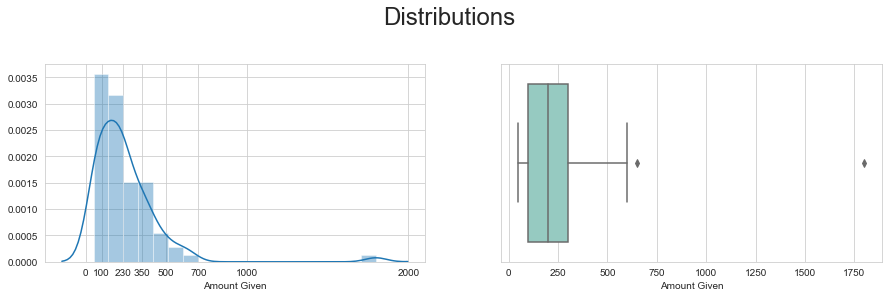

In [63]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
plt.suptitle('Distributions', fontsize=24)

plt.subplot(2,2,1)
plt.xticks([0, 100, 230, 350, 500, 700, 1000, 2000])
#plt.xlabel('Purchase amount', fontsize=18)

sns.distplot(df['Amount Given'])

plt.subplot(2,2,2)
sns.boxplot(x=df['Amount Given'],  palette="Set3")

In [7]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(df['Primary Purpose'].apply(round1))
data_clean.head()

,Primary Purpose
0,to provide funds for needblind admissions
1,psychiatric research
2,to promote interdisciplinary collaborative res...
3,medical school and new yorkpresbyterian hospital
4,matchingchallenge grant


In [8]:
from nltk.corpus import stopwords 
from textblob import TextBlob
import string 

stopwords = stopwords.words("english")

def _clean(txt):
    # lower case
    txt = txt.lower()

    # punctuation removal 
    txt = ''.join(x for x in txt if x not in string.punctuation)

    # stopwords and lemmatization
    clean_txt = ""
    for word in txt.split():
        if word in stopwords:
            continue 
        clean_txt += " "
        clean_txt += word 
    
    noise = ['students','my','title', 'would', 'every', 'will', 'many','also','donotremoveessaydivider']
    for ns in noise:
        clean_txt = clean_txt.replace(ns, "")

    return clean_txt


data_clean['Primary Purpose'] = data_clean['Primary Purpose'].apply(_clean)



,Primary Purpose
0,provide funds needblind admissions
1,psychiatric research
2,promote interdisciplinary collaborative research
3,medical school new yorkpresbyterian hospital
4,matchingchallenge grant


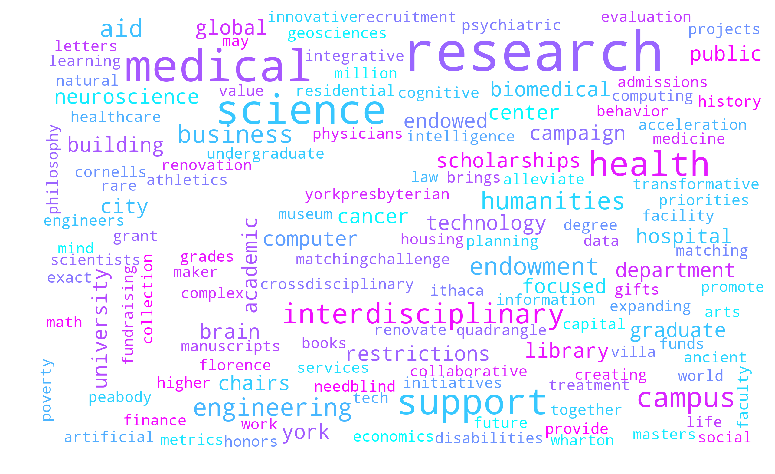

In [15]:
text = " ".join(data_clean['Primary Purpose']).lower()
for w in ['school', 'student', 'college', 'new', 'program', 'create', 'institute', 'study']: # remove some additional noise 
    text = text.replace(w, " ")

from PIL import Image
mask = np.array(Image.open('./degrees.png'))
wc = WordCloud(max_words=1200, stopwords=stopwords, colormap='cool', background_color='White', mask=mask).generate(text)
plt.figure(figsize=(13,13))
plt.imshow(wc)
plt.axis('off')
plt.title('');

In [25]:
df['Amount Given'] = (df['Amount Given'].astype(float)/1000000).astype(str)
df = df.astype({ "Amount Given": float})
df.head()

,College,Year,Primary Purpose,Amount Given
0,Johns Hopkins University,2018,To provide funds for need-blind admissions,1800.0
1,Broad Institute of Harvard University and Mass...,2018,Psychiatric research,650.0
2,California Institute of Technology,2001,"To promote interdisciplinary, collaborative re...",600.0
3,Columbia University,2017,Medical school and New York-Presbyterian Hospital,600.0
4,Oregon Health & Science University,2013,Matching/challenge grant,500.0


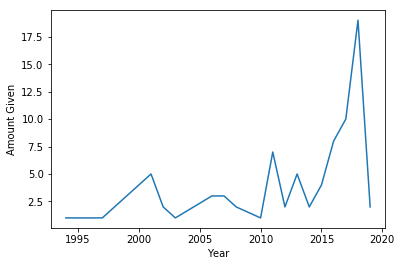

In [52]:
newdf = df.groupby(['Year'], as_index=False).count()
sns.lineplot(x="Year", y="Amount Given", data=newdf)

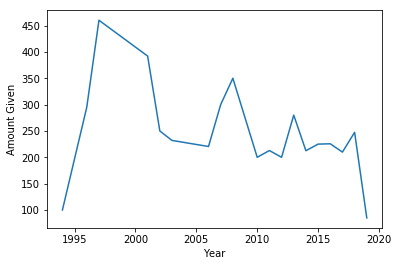

In [47]:
newdf = df.groupby(['Year'], as_index=False)['Amount Given'].mean()
sns.lineplot(x="Year", y="Amount Given", data=newdf)

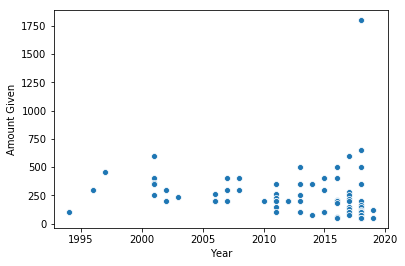

In [49]:
sns.scatterplot(x="Year", y="Amount Given", data=df)